# Serverless examples

In [3]:
config = {'serverless': {'backend': 'ibm_cf'},
          'ibm_cf':  {'serverless': {'backend': 'ibm_cf'},
                      'endpoint': 'https://eu-gb.functions.cloud.ibm.com',
                      'namespace': 'cloudbutton@uvigo.es_dev',
                      'api_key': 'c8a9e3ec-51c9-413b-ac23-e10c3ccb71e1:k3GoGB7GRgyNFYI3ob97GAuKt8ORPYJ9eWjCfIygD0d2xeR9aowjaQlvgm7HhlPm'},
          'ibm_cos': {'endpoint': 'https://s3.eu-gb.cloud-object-storage.appdomain.cloud', #https://s3.eu.cloud-object-storage.appdomain.cloud
                      'private_endpoint': 'https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud',
                      'api_key' : '0GRleyXkQsvdhokMlmI0Ve-p7WxAhnKCJz9F-M7bu9qe'},
          'lithops' : {'storage_bucket' : 'bucket-gerard-eu-gb'}}

In [4]:
import lithops
import os

## call_async.py

Simple Lithops example using the call_async method.
to spawn an internal map execution.

In [2]:
def my_map_function(x):
    print("I'm activation number {}".format(id))
    return x + 7

def scheduler(total):
    iterdata = range(total)
    print(iterdata)
    return fexec.map(my_map_function, iterdata)

In [3]:
fexec = lithops.FunctionExecutor()
fexec.call_async(scheduler, 4)
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-0 | JobID A000 - Selected Runtime: python3 
ExecutorID eb784d-0 | JobID A000 - Uploading function and data - Total: 1.8KiB
ExecutorID eb784d-0 | JobID A000 - scheduler() Invocation done - Total: 1 activations
ExecutorID eb784d-0 - Getting results...



[7, 8, 9, 10]


In [4]:
fexec.clean()

## cloudobject.py

In [6]:
def my_function_put(text, storage):
    co1 = storage.put_cobject('Cloudobject test 1: {}'.format(text, ))
    co2 = storage.put_cobject('Cloudobject test 2: {}'.format(text, ))
    return [co1, co2]


def my_function_get(co, storage):
    data = storage.get_cobject(co)
    return data

In [8]:
if __name__ == "__main__":
    """
    Managing cloudobjects with context manager.
    At the end of the with statement all
    cloudobjects are automatically deleted.
    """
    with lithops.FunctionExecutor() as fexec:
        fexec.call_async(my_function_put, 'Hello World')
        cloudobjects = fexec.get_result()
        fexec.map(my_function_get, cloudobjects)
        print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-2 | JobID A000 - Selected Runtime: python3 
ExecutorID eb784d-2 | JobID A000 - Uploading function and data - Total: 715.0B
ExecutorID eb784d-2 | JobID A000 - my_function_put() Invocation done - Total: 1 activations
ExecutorID eb784d-2 - Getting results...



ExecutorID eb784d-2 | JobID M001 - Selected Runtime: python3 
ExecutorID eb784d-2 | JobID M001 - Uploading function and data - Total: 920.0B
ExecutorID eb784d-2 | JobID M001 - my_function_get() Invocation done - Total: 2 activations
ExecutorID eb784d-2 - Getting results...



[b'Cloudobject test 1: Hello World', b'Cloudobject test 2: Hello World']


## ibmcos_arg.py

In [9]:
def my_function(bucket_name, key, ibm_cos):
    print('I am processing the object cos://{}/{}'.format(bucket_name, key))
    counter = {}

    data = ibm_cos.get_object(Bucket=bucket_name, Key=key)['Body'].read()

    for line in data.splitlines():
        for word in line.decode('utf-8').split():
            if word not in counter:
                counter[word] = 1
            else:
                counter[word] += 1

    return counter

In [12]:
if __name__ == '__main__':
    fexec = lithops.FunctionExecutor(config=config, runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
    fexec.call_async(my_function, ['cb-comunidad-valenciana', 'cuatro.txt'])
    print(fexec.get_result())

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-5 | JobID A000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-5 | JobID A000 - Uploading function and data - Total: 939.0B
ExecutorID eb784d-5 | JobID A000 - Starting function invocation: my_function() - Total: 1 activations
ExecutorID eb784d-5 - Getting results...



{'ahora': 1, 'tenemos': 1, 'cuatro': 1, 'palabras': 1}


## Internal_execution.py

Simple Lithops example using one single function invocation
which internally invokes a map.

In [13]:
def my_map_function(id, x):
    print("I'm activation number {}".format(id))
    return x + 7


def my_function(x):
    iterdata = range(x)
    fexec = lithops.FunctionExecutor()
    return fexec.map(my_map_function, iterdata)

In [14]:
if __name__ == '__main__':
    fexec = lithops.FunctionExecutor()
    fexec.call_async(my_function, 3)
    fexec.wait()
    print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-6 | JobID A000 - Selected Runtime: python3 
ExecutorID eb784d-6 | JobID A000 - Uploading function and data - Total: 877.0B
ExecutorID eb784d-6 | JobID A000 - my_function() Invocation done - Total: 1 activations
ExecutorID eb784d-6 - Waiting for functions to complete...



ExecutorID eb784d-6 - Getting results...



[7, 8, 9]


## map.py

In [223]:
import lithops

In [224]:
def my_map_function(id, x):
    print("I'm activation number {}".format(id))
    return ('Adding {} con activation num: {}'.format(x+7,id))

In [225]:
iterdata = [1, 2]
fexec = lithops.FunctionExecutor()
fexec.map(my_map_function, iterdata)
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID 74219c-93 | JobID M000 - Selected Runtime: python3 
ExecutorID 74219c-93 | JobID M000 - Uploading function and data - Total: 699.0B
ExecutorID 74219c-93 | JobID M000 - my_map_function() Invocation done - Total: 2 activations
ExecutorID 74219c-93 - Getting results...



['Adding 8 con activation num: 0', 'Adding 9 con activation num: 1']


In [8]:
fexec.clean()

## map_cos_prefix.py 

Simple Lithops example using the map method which runs a wordcount
over all the objects inside the 'bucketname' COS bucket independently.

In [15]:
data_location = 'cos://cb-comunidad-valenciana'

- obj.bucket: cos://cb-comunidad-valenciana

- obj.key: lorem ipsum.txt , texto.txt

- obj.part: 0 , 0

In [16]:
def my_map_function(obj):
    print('Bucket: {}'.format(obj.bucket))
    print('Key: {}'.format(obj.key))
    print('Partition num: {}'.format(obj.part))
    counter = {}

    data = obj.data_stream.read()

    for line in data.splitlines():
        for word in line.decode('utf-8').split():
            if word not in counter:
                counter[word] = 1
            else:
                counter[word] += 1
    return(counter)

In [17]:
#fexec = lithops.FunctionExecutor()
fexec = lithops.FunctionExecutor(config=config, runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
fexec.map(my_map_function, data_location)

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-7 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-7 | JobID M000 - Uploading function and data - Total: 1.4KiB
ExecutorID eb784d-7 | JobID M000 - Starting function invocation: my_map_function() - Total: 3 activations


In [18]:
print(fexec.get_result())

ExecutorID eb784d-7 - Getting results...



[{'ahora': 1, 'tenemos': 1, 'cuatro': 1, 'palabras': 1}, {'seis': 6, 'son': 1, 'vocablos': 1, 'aleatorios': 1}, {'tenemos': 1, 'tres': 1, 'palabras': 1}]


## map_reduce.py

In this example the map_reduce() method will launch one map function for each entry in 'iterdata', and then it will wait locally for the results. Once the results be ready, it will launch the reduce function.

In [19]:
def my_map_function(x):
    return x + 7


def my_reduce_function(results):
    total = 0
    for map_result in results:
        total = total + map_result
    return total

In [20]:
iterdata = [1, 2, 3, 4, 5, 6]

By default the reducer will be launched within a Cloud Function
when the local Lithops have all the results from the mappers.

In [24]:
fexec = lithops.FunctionExecutor()
fexec.map_reduce(my_map_function, iterdata, my_reduce_function)
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-10 | JobID M000 - Selected Runtime: python3 
ExecutorID eb784d-10 | JobID M000 - Uploading function and data - Total: 672.0B
ExecutorID eb784d-10 | JobID M000 - my_map_function() Invocation done - Total: 6 activations
ExecutorID eb784d-10 | JobID R000 - Selected Runtime: python3 
ExecutorID eb784d-10 | JobID R000 - Uploading function and data - Total: 2.3KiB
ExecutorID eb784d-10 | JobID R000 - my_reduce_function() Invocation done - Total: 1 activations
ExecutorID eb784d-10 - Getting results...



63


## map_reduce_cos_bucket.py

In [35]:
bucketname = 'cos://cb-comunidad-valenciana' 
chunk_size = 4*1024**2  # 4MB

In [40]:
def my_map_function(obj):
    print('Bucket: {}'.format(obj.bucket))
    print('Key: {}'.format(obj.key))
    print('Partition num: {}'.format(obj.part))
    counter = {}

    data = obj.data_stream.read()

    for line in data.splitlines():
        for word in line.decode('utf-8').split():
            if word not in counter:
                counter[word] = 1
            else:
                counter[word] += 1

    return counter


def my_reduce_function(results):
    final_result = {}
    for count in results:
        for word in count:
            if word not in final_result:
                final_result[word] = count[word]
            else:
                final_result[word] += count[word]

    return final_result

In [37]:
fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
fexec.map_reduce(my_map_function, bucketname, my_reduce_function, chunk_size=chunk_size)
print(fexec.get_result())

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-16 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-16 | JobID M000 - Uploading function and data - Total: 1.4KiB
ExecutorID eb784d-16 | JobID M000 - Starting function invocation: my_map_function() - Total: 3 activations
ExecutorID eb784d-16 | JobID R000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-16 | JobID R000 - Uploading function and data - Total: 3.4KiB
ExecutorID eb784d-16 | JobID R000 - Starting function invocation: my_reduce_function() - Total: 1 activations
ExecutorID eb784d-16 - Getting results...



{'ahora': 1, 'tenemos': 2, 'cuatro': 1, 'palabras': 2, 'seis': 6, 'son': 1, 'vocablos': 1, 'aleatorios': 1, 'tres': 1}


One reducer for each object in the bucket

In [28]:
print('One reducer per object:')
fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
fexec.map_reduce(my_map_function, bucketname, my_reduce_function, chunk_size=chunk_size,
                 reducer_one_per_object=True)
print(fexec.get_result())

One reducer per object:
Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-12 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-12 | JobID M000 - Uploading function and data - Total: 1.4KiB
ExecutorID eb784d-12 | JobID M000 - Starting function invocation: my_map_function() - Total: 3 activations
ExecutorID eb784d-12 | JobID R000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-12 | JobID R000 - Uploading function and data - Total: 7.7KiB
ExecutorID eb784d-12 | JobID R000 - Starting function invocation: my_reduce_function() - Total: 3 activations
ExecutorID eb784d-12 - Getting results...



[{'ahora': 1, 'tenemos': 1, 'cuatro': 1, 'palabras': 1}, {'seis': 6, 'son': 1, 'vocablos': 1, 'aleatorios': 1}, {'tenemos': 1, 'tres': 1, 'palabras': 1}]


## map_reduce_cos_key.py

In [44]:
iterdata = ['cos://cb-comunidad-valenciana/cuatro.txt',
            'cos://cb-comunidad-valenciana/texto.txt'] 

In [45]:
def my_map_function(obj):
    print('Bucket: {}'.format(obj.bucket))
    print('Key: {}'.format(obj.key))
    print('Partition num: {}'.format(obj.part))
    counter = {}
    data = obj.data_stream.read()

    for line in data.splitlines():
        for word in line.decode('utf-8').split():
            if word not in counter:
                counter[word] = 1
            else:
                counter[word] += 1

    return counter


def my_reduce_function(results):
    final_result = {}
    for count in results:
        for word in count:
            if word not in final_result:
                final_result[word] = count[word]
            else:
                final_result[word] += count[word]

    return final_result

Same map and reduce function as before

In [47]:
chunk_size = 4*1024**2  # 4MB

fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
fexec.map_reduce(my_map_function, iterdata, my_reduce_function, chunk_size=chunk_size)
print(fexec.get_result())

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-20 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-20 | JobID M000 - Uploading function and data - Total: 1.2KiB
ExecutorID eb784d-20 | JobID M000 - Starting function invocation: my_map_function() - Total: 2 activations
ExecutorID eb784d-20 | JobID R000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-20 | JobID R000 - Uploading function and data - Total: 3.2KiB
ExecutorID eb784d-20 | JobID R000 - Starting function invocation: my_reduce_function() - Total: 1 activations
ExecutorID eb784d-20 - Getting results...



{'ahora': 1, 'tenemos': 2, 'cuatro': 1, 'palabras': 2, 'tres': 1}


In [48]:
print('Testing one reducer per object:')
fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
fexec.map_reduce(my_map_function, iterdata, my_reduce_function, chunk_size=chunk_size,
              reducer_one_per_object=True)
print(fexec.get_result())

Testing one reducer per object:
Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-21 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-21 | JobID M000 - Uploading function and data - Total: 1.2KiB
ExecutorID eb784d-21 | JobID M000 - Starting function invocation: my_map_function() - Total: 2 activations
ExecutorID eb784d-21 | JobID R000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-21 | JobID R000 - Uploading function and data - Total: 5.3KiB
ExecutorID eb784d-21 | JobID R000 - Starting function invocation: my_reduce_function() - Total: 2 activations
ExecutorID eb784d-21 - Getting results...



[{'ahora': 1, 'tenemos': 1, 'cuatro': 1, 'palabras': 1}, {'tenemos': 1, 'tres': 1, 'palabras': 1}]


## multiple_args_map.py

There is also multiple_args_call_async.py for just one function execution in the cloud with multiple args.

In [60]:
def my_map_function(x, y):
    return x + y

def sum_list(list_of_numbers):
    total = 0
    for num in list_of_numbers:
        total = total+num
    return total

def sum_list_mult(list_of_numbers, x):
    total = 0
    for num in list_of_numbers:
        total = total+num
    return total*x

In [61]:
args = [  # Init list of parameters for Lithops
        (1, 2),  # Args for function1
        (3, 4),  # Args for function2
        (5, 6),  # Args for function3
       ]  # End list of parameters for Lithops

fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
fexec.map(my_map_function, args)
print(fexec.get_result())

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID eb784d-32 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID eb784d-32 | JobID M000 - Uploading function and data - Total: 632.0B
ExecutorID eb784d-32 | JobID M000 - Starting function invocation: my_map_function() - Total: 3 activations
ExecutorID eb784d-32 - Getting results...



[3, 7, 11]


The parameters can also be sent into a dictionary. In this case you have to map them to the correct parameter of the function as in the next example.

In [64]:
kwargs = [  # Init list of parameters for Lithops
          {'x': 2, 'y': 5},  # Kwargs for function1
          {'x': 3, 'y': 10},  # Kwargs for function2
          {'x': 5, 'y': 6},  # Kwargs for function3
         ]  # End list of parameters for Lithops

fexec = lithops.FunctionExecutor()
fexec.map(my_map_function, kwargs)
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-35 | JobID M000 - Selected Runtime: python3 
ExecutorID eb784d-35 | JobID M000 - Uploading function and data - Total: 632.0B
ExecutorID eb784d-35 | JobID M000 - my_map_function() Invocation done - Total: 3 activations
ExecutorID eb784d-35 - Getting results...



[7, 13, 11]


In [65]:
args = [  # Init list of parameters for Lithops
        ([1, 2],),  # Args for function1
        ([3, 4],),  # Args for function2
        ([5, 6],),  # Args for function3
       ]  # End list of parameters for Lithops

fexec = lithops.FunctionExecutor()
fexec.map(sum_list, args)
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-36 | JobID M000 - Selected Runtime: python3 
ExecutorID eb784d-36 | JobID M000 - Uploading function and data - Total: 714.0B
ExecutorID eb784d-36 | JobID M000 - sum_list() Invocation done - Total: 3 activations
ExecutorID eb784d-36 - Getting results...



[3, 7, 11]


In [66]:
args = [  # Init list of args for Lithops
        ([1, 2, 3, 4, 5], 2),  # Args for function1
        ([6, 7, 8, 9, 10], 3),  # Args for function2
        ([11, 12, 13, 14, 15], 4)  # Args for function3
       ]  # End list of parameters for Lithops

fexec = lithops.FunctionExecutor()
fexec.map(sum_list_mult, args)
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-37 | JobID M000 - Selected Runtime: python3 
ExecutorID eb784d-37 | JobID M000 - Uploading function and data - Total: 767.0B
ExecutorID eb784d-37 | JobID M000 - sum_list_mult() Invocation done - Total: 3 activations
ExecutorID eb784d-37 - Getting results...



[30, 120, 260]


Pendiente de entender la siguiente celda:

In [67]:
args = [0, 1, 2]
fexec = lithops.FunctionExecutor()
fexec.map(my_map_function, args, extra_args=(10,))
print(fexec.get_result())

kwargs = [  # Init list of parameters for Lithops
          {'x': 1},  # Kwargs for function1
          {'x': 3},  # Kwargs for function2
          {'x': 5},  # Kwargs for function3
         ]  # End list of parameters for Lithops

fexec = lithops.FunctionExecutor()
fexec.map(my_map_function, kwargs, extra_args={'y': 3})
print(fexec.get_result())

Lithops v2.2.5 init for Localhost
ExecutorID eb784d-38 | JobID M000 - Selected Runtime: python3 
ExecutorID eb784d-38 | JobID M000 - Uploading function and data - Total: 632.0B
ExecutorID eb784d-38 | JobID M000 - my_map_function() Invocation done - Total: 3 activations
ExecutorID eb784d-38 - Getting results...



[10, 11, 12]
Lithops v2.2.5 init for Localhost
ExecutorID eb784d-39 | JobID M000 - Selected Runtime: python3 
ExecutorID eb784d-39 | JobID M000 - Uploading function and data - Total: 632.0B
ExecutorID eb784d-39 | JobID M000 - my_map_function() Invocation done - Total: 3 activations
ExecutorID eb784d-39 - Getting results...



[4, 6, 8]


## storage.py

In [1]:
from lithops import FunctionExecutor, Storage

ImportError: cannot import name 'Storage' from 'lithops' (/opt/conda/lib/python3.8/site-packages/lithops/__init__.py)

In [77]:
BUCKET_NAME = 'cb-comunidad-valenciana'


def my_function(obj_id, storage):
    print(obj_id)

    data = storage.get_cobject(obj_id)

    return data.decode()

In [78]:
obj_key = 'texto.txt'
storage = Storage()
obj_id = storage.put_cobject('Hello World!', BUCKET_NAME, obj_key)
print(obj_id)

fexec = FunctionExecutor()
fexec.call_async(my_function, obj_id)
print(fexec.get_result())

NameError: name 'Storage' is not defined

## wait.py

In [12]:
import time

total = 10


def my_function(x):
    time.sleep(5)
    return x + 7

In [14]:
fexec = lithops.FunctionExecutor(runtime_memory=256)
fexec.map(my_function, range(total))
fexec.wait()  # blocks current execution until all function activations finish
fexec.clean()

Lithops v2.2.5 init for Localhost
ExecutorID ede234-4 | JobID M000 - Selected Runtime: python3 
ExecutorID ede234-4 | JobID M000 - Uploading function and data - Total: 812.0B
ExecutorID ede234-4 | JobID M000 - my_function() Invocation done - Total: 10 activations
ExecutorID ede234-4 - Waiting for functions to complete...


In [15]:
fexec = lithops.FunctionExecutor(runtime_memory=256)
fexec.map(my_function, range(total))

fexec.clean()

Lithops v2.2.5 init for Localhost
ExecutorID ede234-5 | JobID M000 - Selected Runtime: python3 
ExecutorID ede234-5 | JobID M000 - Uploading function and data - Total: 812.0B
ExecutorID ede234-5 | JobID M000 - my_function() Invocation done - Total: 10 activations


## Serverless testing

In [16]:
def map_model(obj, ibm_cos): # pasar aqui un diccionario con el modelo y la imagen
    print(obj.key + '+' + obj.bucket)
    import io
    import rasterio
    from rasterio.plot import reshape_as_image
    import joblib
    with rasterio.open(obj.data_stream) as src:
        band_count = src.count
    return band_count

In [338]:
def map_model(obj, ibm_cos): # pasar aqui un diccionario con el modelo y la imagen
    import io
    import rasterio
    from rasterio.plot import reshape_as_image
    import joblib
    with rasterio.open(obj.data_stream) as src:
        img = src.read()#[:, 150: 200, 150 : 250]  #posicion    col_off, row_off, width, height
        reshaped_img = reshape_as_image(img)
        shapefile = ibm_cos.get_object(Bucket=obj.bucket, Key='modelos2/finalized_model_joblib.sav')['Body']
        loaded_model = joblib.load(io.BytesIO(shapefile.read())) #also (filename2) => Funciona
        # For each pixel of our we perform a prediction
        prediction = loaded_model.predict(reshaped_img.reshape(-1, 3))
        #we reshape our classified image in a 2d matrix to be able to see it
        prediction = prediction.reshape(reshaped_img[:, :, 0].shape)
        #We use the previously performed function to convert the strings that the shapefile initially gave us into a numpy
        prediction[prediction == 'superficie_artificial'] = 0
        prediction[prediction == 'bosque_de_coniferas'] = 1
        prediction[prediction == 'bosque_de_frondosas'] = 2
        prediction[prediction == 'zonas_agricolas'] = 3
        prediction[prediction == 'vegetacion_esclerofila'] = 4
        prediction[prediction == 'pastizales_naturales'] = 5
        prediction[prediction == 'matorral_boscoso_de_transicion'] = 6
        prediction[prediction == 'zonas_quedamas'] = 7
        prediction[prediction == 'zonas_humedas'] = 8
        prediction[prediction == 'superficie_agua'] = 9
        
        prediction= (prediction.astype(int))
        y = prediction.astype(np.int32)
    return prediction

In [325]:
iterdata  = ['cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4400000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4416000.0_comunidad_mask.tif']

In [333]:
if __name__ == "__main__":
    # For Python 3.7 use mavsonnen/lithops-py37:latest + For Python 3.7 use mavsonnen/jdsampe:nogdal
    fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
    fexec.map(map_model, iterdata)# data_location)
    results = fexec.get_result()
    print(results)

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID 74219c-129 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID 74219c-129 | JobID M000 - Uploading function and data - Total: 1.7KiB
ExecutorID 74219c-129 | JobID M000 - Starting function invocation: map_model() - Total: 2 activations
ExecutorID 74219c-129 - Getting results...



[array([[0, 0, 0, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]]), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 0]])]


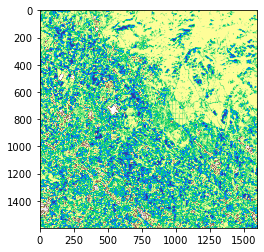

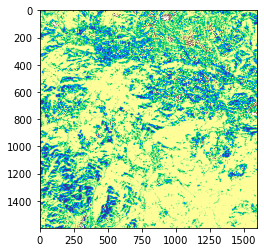

In [336]:
    for img in results:
        show(img, cmap='terrain')

In [335]:
len(results[0])

1599

# Serverless geospatial

In [257]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from shapely.geometry import mapping
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster
from rasterio.plot import reshape_as_image
import matplotlib.pyplot as plt
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep
#import geopandas as gpd
import numpy as np
#import lithops
import pandas
import pickle
import joblib
import time
import glob
import os
print("Done")

Done


In [252]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import lithops
import pickle
import os
warnings.filterwarnings('ignore')

config = {'serverless': {'backend': 'ibm_cf'},
          'ibm_cf':  {'serverless': {'backend': 'ibm_cf'},
                      'endpoint': 'https://eu-gb.functions.cloud.ibm.com',
                      'namespace': 'cloudbutton@uvigo.es_dev',
                      'api_key': 'c8a9e3ec-51c9-413b-ac23-e10c3ccb71e1:k3GoGB7GRgyNFYI3ob97GAuKt8ORPYJ9eWjCfIygD0d2xeR9aowjaQlvgm7HhlPm'},
          'ibm_cos': {'endpoint': 'https://s3.eu-gb.cloud-object-storage.appdomain.cloud', #https://s3.eu.cloud-object-storage.appdomain.cloud
                      'private_endpoint': 'https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud',
                      'api_key' : '0GRleyXkQsvdhokMlmI0Ve-p7WxAhnKCJz9F-M7bu9qe'},
          'lithops' : {'storage_bucket' : 'bucket-gerard-eu-gb'}}

In [260]:
iterdata  = ['cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4400000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4416000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4432000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4448000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4464000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4480000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4400000.0_comunidad_mask.tif']

In [254]:
iterdata  = ['cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4400000.0_comunidad_mask.tif',
             'cos://bucket-gerard-eu-gb/imagenes/valenciana_704000.0-4416000.0_comunidad_mask.tif']

In [300]:
def map_model(obj, ibm_cos): # pasar aqui un diccionario con el modelo y la imagen
    print(obj.key + '+' + obj.bucket)
    import io
    import rasterio
    from rasterio.plot import reshape_as_image
    import joblib
    with rasterio.open(obj.data_stream) as src:
        img = src.read()#[:, 150: 200, 150 : 250]  #posicion    col_off, row_off, width, height
        reshaped_img = reshape_as_image(img)
        shapefile = ibm_cos.get_object(Bucket=obj.bucket, Key='modelos/finalized_model_joblib.sav')['Body']
        loaded_model = joblib.load(io.BytesIO(shapefile.read())) #also (filename2) => Funciona
        # For each pixel of our we perform a prediction
        prediction = loaded_model.predict(reshaped_img.reshape(-1, 3))
        #we reshape our classified image in a 2d matrix to be able to see it
        prediction = prediction.reshape(reshaped_img[:, :, 0].shape)
        #We use the previously performed function to convert the strings that the shapefile initially gave us into a numpy
        prediction[prediction == 'agua'] = 0
        prediction[prediction == 'bosque'] = 1
        prediction[prediction == 'cultivos'] = 2
        prediction[prediction == 'urbano'] = 3
        prediction= (prediction.astype(int))
        y = prediction.astype(np.int32)
    return  prediction
    
def reduce_prediction(Y):
    SalidaR = rasterio.open(path + 'rasteriop.tif','w',
                       driver='Gtiff',
                       width = 1000,
                       height = 500,
                       count=1,
                       crs = full_data.crs,  # TODO: Check this => full_dataset.crs,
                       transform = full_data.transform, # TODO: Check this => full_dataset.crs,
                       dtype='int32')
    for y in Y:
        path = 'cos://bucket-gerard-eu-gb/imagenes/'
        SalidaR.write(y,1)
        SalidaR.close()
    return SalidaR

In [301]:
if __name__ == "__main__":
    # For Python 3.7 use mavsonnen/lithops-py37:latest + For Python 3.7 use mavsonnen/jdsampe:nogdal
    fexec = lithops.FunctionExecutor(config=config,runtime='mavsonnen/jdsampe:nogdal', runtime_memory=2048)
    fexec.map(map_model, iterdata)# data_location)
    results = fexec.get_result()
    for img in results:
        show(img, cmap='terrain')

Lithops v2.2.5 init for IBM Cloud Functions - Namespace: cloudbutton@uvigo.es_dev - Region: eu_gb
ExecutorID 74219c-120 | JobID M000 - Selected Runtime: mavsonnen/jdsampe:nogdal - 2048MB 
ExecutorID 74219c-120 | JobID M000 - Uploading function and data - Total: 1.7KiB
ExecutorID 74219c-120 | JobID M000 - Starting function invocation: map_model() - Total: 2 activations
ExecutorID 74219c-120 - Getting results...


NameError: name 'ibm_cos' is not defined